In [53]:
import os
import cv2
import matplotlib.pyplot as plt

import zipfile_deflate64 as zipfile
from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import YouTubeVideo, display, HTML
from base64 import b64encode

%matplotlib inline

In [54]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)

    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)

In [55]:
URL = r"https://www.dropbox.com/s/p8h7ckeo2dn1jtz/opencv_bootcamp_assets_NB6.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), f"opencv_bootcamp_assets_NB6.zip")

# Download if assest ZIP does not exists. 
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)  

[ WARN:0@5163.307] global /private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_11nitadzeg/croot/opencv-suite_1691620374638/work/modules/videoio/src/cap_gstreamer.cpp (2386) handleMessage OpenCV | GStreamer warning: your GStreamer installation is missing a required plugin
[ WARN:0@5163.307] global /private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_11nitadzeg/croot/opencv-suite_1691620374638/work/modules/videoio/src/cap_gstreamer.cpp (2402) handleMessage OpenCV | GStreamer warning: Embedded video playback halted; module uridecodebin7 reported: Your GStreamer installation is missing a plug-in.
[ WARN:0@5163.307] global /private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_11nitadzeg/croot/opencv-suite_1691620374638/work/modules/videoio/src/cap_gstreamer.cpp (1356) open OpenCV | GStreamer warning: unable to start pipeline
[ WARN:0@5163.307] global /private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_11nitadzeg/croot/opencv-suite_1691620374638/work/modules/v

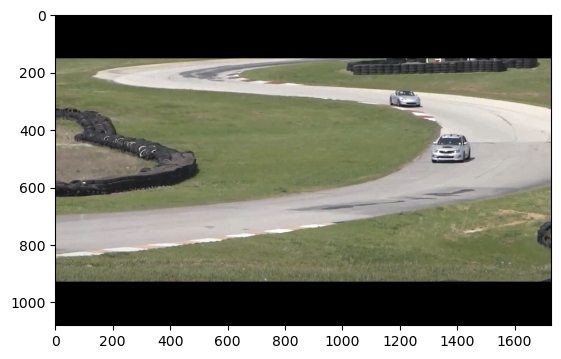

In [56]:
source = 'race_car.mp4'

cap = cv2.VideoCapture(source)

if not cap.isOpened():
    print("Error opening video stream or file")

ret, frame = cap.read()
plt.imshow(frame[...,::-1])

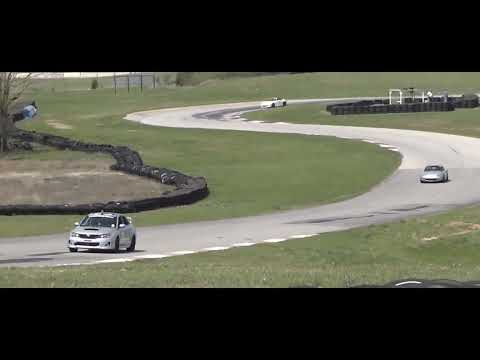

In [57]:
video = YouTubeVideo("RwxVEjv78LQ", width=700, height=438)
display(video)

### Write Video using OpenCV

In [58]:
# Default resolutions of the frame are obtained.
# Convert from float to integer.
frame_width = 700
frame_height = 438

# Define the codec and create VideoWriter object.
out_avi = cv2.VideoWriter("./race_car_out.avi", cv2.VideoWriter_fourcc("M", "J", "P", "G"), 10, (frame_width, frame_height))
out_mp4 = cv2.VideoWriter("./race_car_out.mp4", cv2.VideoWriter_fourcc(*"XVID"), 10, (frame_width, frame_height))


(<unknown>:45059): GStreamer-CRITICAL **: 10:48:43.167: gst_element_make_from_uri: assertion 'gst_uri_is_valid (uri)' failed
[ WARN:0@5163.711] global /private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_11nitadzeg/croot/opencv-suite_1691620374638/work/modules/videoio/src/cap_gstreamer.cpp (2180) open OpenCV | GStreamer warning: cannot link elements
[ERROR:0@5163.712] global /private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_11nitadzeg/croot/opencv-suite_1691620374638/work/modules/videoio/src/cap.cpp (597) open VIDEOIO(CV_IMAGES): raised OpenCV exception:

OpenCV(4.6.0) /private/var/folders/k1/30mswbxs7r1g6zwn8y4fyt500000gp/T/abs_11nitadzeg/croot/opencv-suite_1691620374638/work/modules/videoio/src/cap_images.cpp:253: error: (-5:Bad argument) CAP_IMAGES: can't find starting number (in the name of file): ./race_car_out.avi in function 'icvExtractPattern'



(<unknown>:45059): GStreamer-CRITICAL **: 10:48:43.168: gst_element_make_from_uri: assertion 'gst_uri_is_valid (u

In [59]:
while cap.isOpened():
    ret, frame = cap.read()

    if ret:
        out_avi.write(frame)
        out_mp4.write(frame)

    else:
        break

In [60]:
cap.release()
out_avi.release()
out_mp4.release()